## Highs And Lows Of The Stock Market - Time Series

A stock market is a place where many individuals and organizations invest their money in a company/service in return for an equivalent share of right and ownership within the organization. Here we study the Indian stock market while selecting the top 5 stock highly active. Our major focus is the "Adjusted Close" (Adj Close) for 2 years. The Adjusted Close is the closing price of the stock per day. In this notebook, we will extract, analyze and build a predictive model.
<br>Here is the outline which we will be following to analyze and predict the share price of the stocks. 
<li>Extract the share price of the most active stock with the help of  " pandas_datareader.data " from &nbsp;<a href="https://in.finance.yahoo.com/">Yahoo Finance.</a>
<li>Analyze the share price of each stock.
<li>Before building our model we need our data to be "Stationary", Thus transform the data into a stationary state.
<li>Use the ARIMA or SARIMA to build a predictive model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

from statsmodels.tsa.stattools import adfuller

## 1. Extraction Of Data

A DataReader is used to read the data from a given data source. The "pandas_datareader.data" is a very useful python library that performs this function efficiently. As mentioned before we are using the data extracted from the website yahoo finance. This website identifies each stock by a unique name. To complete the extraction we need to specify the starting and ending period of the stock we wish to analyze.

In [2]:
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)

In [3]:
YES = web.DataReader("YESBANK.NS", 'yahoo', start, end)
VODAIDEA = web.DataReader("IDEA.NS", 'yahoo', start, end)
ICICI = web.DataReader("ICICIBANK.NS", 'yahoo', start, end)
SAIL = web.DataReader("SAIL.NS", 'yahoo', start, end)
REL = web.DataReader("RCOM.NS", 'yahoo', start, end)

In [4]:
df = pd.DataFrame({'YES': YES['Adj Close'], 'VODAFONE': VODAIDEA['Adj Close'],
                   'ICICI': ICICI['Adj Close'], 'SAIL': SAIL['Adj Close'],
                   'RELIANCE': REL['Adj Close']})

In [5]:
df.head()

,YES,VODAFONE,ICICI,SAIL,RELIANCE
Date,,,,,
2018-08-14,372.274597,31.354401,329.362152,76.184929,20.650000
2018-08-16,368.332855,30.510201,331.194916,73.281235,18.549999
2018-08-17,382.688568,30.691099,336.842010,74.659256,19.200001
2018-08-20,383.467163,32.198502,335.306427,76.529434,19.049999
2018-08-21,380.888000,31.897100,335.702698,76.184929,18.799999


## 2. Analysis Of Data

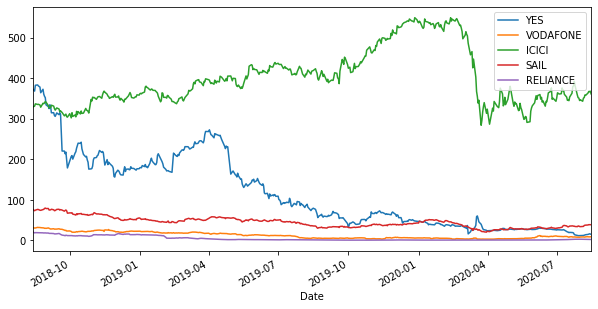

In [6]:
df.plot(figsize=(10,5))
plt.legend(loc='upper right')

Reliance, Vodafone, and Steel Authority of India are seen experiencing a low share price for the past 2 years. Yes Bank experiences a fluctuation for the period between 2018 and the first quarter of 2019. It then has a steep fall in the share price. Although the share price of ICICI Bank has fallen steadily in the first quarter of 2020 we notice an increase in the second quarter. Thus we can say that it performs much better compared to the rest of the shares.

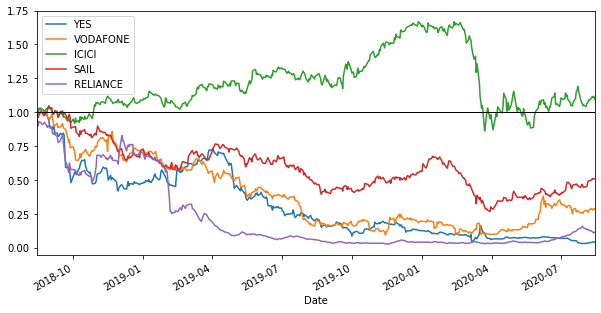

In [7]:
start = df.apply(lambda x: x / x[0])
start.plot(figsize=(10,5)).axhline(1, lw=1, color='black')

After normalization of the stocks, we notice that our previous analysis for ICICI Bank proves to be correct and that it performs must better than the other stocks. Whereas Reliance has performed very poorly.

We choose the best and the poorly fairing share price for further steps. They are ICICI Bank and Reliance.

## 3. Transformation Of Data

The components of time-series are the changes in the time series that are caused directly / indirectly due to internal or external factors such as economic, social, political, and organizational. These components can be looked upon as <b>"Patterns"</b>. The components are as follows:<br>
<li> Trends
<li> Seasonality
<li> Cyclic
<li> Random or Irregular <br><br>
These patterns affect the valuation of the time series, thus we need to handle them.<br><br>
The Augmented Dickey-Fuller test helps us identify whether or not the time-series is stationary. The adfuller function returns 5 values from which we can conclude to the stationary of the time-series.
<br>A time series is stationary if:
<li>The Test Statistic is less than the Critical Values.
<li>The p-value is less than 0.05.

In [8]:
def DF(series):
    
    series = series.dropna()

    print('Dickey Fuller Test')
    test = adfuller(series, autolag='AIC')

    output = pd.Series(test[0:2], index=['Test Statistic','p-value'])
    
    for key,value in test[4].items():
        output['Critical Value (%s)'%key] = value

    print(output)
    print()
    
    if test[1] <= 0.05:
        print("The Time-Series is Stationary\n")
    else:
        print("The Time-Series is Not Stationary\n")
    

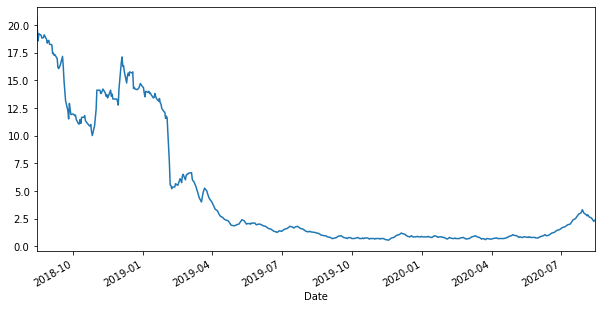

In [9]:
plt.figure(figsize=(10,5))
df['RELIANCE'].plot()

We notice that the Reliance stock has begun falling gradually between January and February 2019. This shows us a downward trend of the stock, thus we need to transform this trend to its equivalent stationary series. This can be achieved through the following:
<li> Log Transformation.
<li> Power Transformation.
<li> Rolling Window Mean or Median.

In [10]:
def trendtransformation(series):
    
    #Log transformation of the values
    LogTransformation = series.apply(lambda x : np.log(x))
    LogTransformation = LogTransformation.dropna()
    
    #Transformation of values to the power of 0.5
    PowerTransformation = series.apply(lambda x : x ** 0.5)
    PowerTransformation = PowerTransformation.dropna()
    
    #Obtaining the difference between the series and its rolling window values (i.e: series 1st value - series 12th value)  
    rollingmean = series.rolling(window = 12).mean()
    detrend = series - rollingmean
    detrend = detrend.dropna()
    

    #Plotting the transformed values of the series
    plt.figure(figsize=(15,5))

    plt.subplot(2,2,1)
    series.plot()
    plt.title("Original Value")

    plt.subplot(2,2,2)
    LogTransformation.plot()
    plt.title("Log Transformation Value")

    plt.subplot(2,2,3)
    PowerTransformation.plot()
    plt.title("Power Transformation Value")

    plt.subplot(2,2,4)
    detrend.plot()
    plt.title("Rolling Mean Value")
    
    plt.tight_layout(pad=0.5)
    plt.show(block=False)
    
    
    print("***** Log Transformation *****")
    DF(LogTransformation)
    print("***** Power Transformation *****")
    DF(PowerTransformation)
    print("***** Rolling Mean *****")
    DF(detrend)

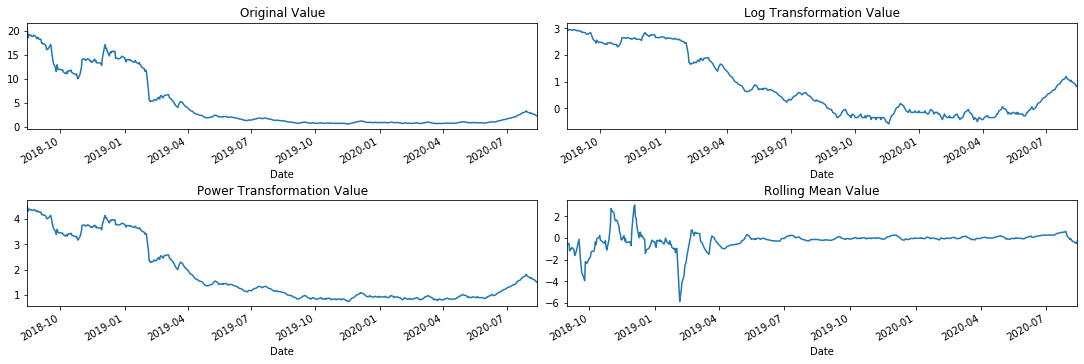

***** Log Transformation *****
Dickey Fuller Test
Test Statistic         -1.808123
p-value                 0.376436
Critical Value (1%)    -3.443877
Critical Value (5%)    -2.867505
Critical Value (10%)   -2.569947
dtype: float64

The Time-Series is Not Stationary

***** Power Transformation *****
Dickey Fuller Test
Test Statistic         -2.436297
p-value                 0.131753
Critical Value (1%)    -3.443962
Critical Value (5%)    -2.867543
Critical Value (10%)   -2.569967
dtype: float64

The Time-Series is Not Stationary

***** Rolling Mean *****
Dickey Fuller Test
Test Statistic         -5.535392
p-value                 0.000002
Critical Value (1%)    -3.444281
Critical Value (5%)    -2.867683
Critical Value (10%)   -2.570042
dtype: float64

The Time-Series is Stationary



In [11]:
trendtransformation(df['RELIANCE'])

The time-series has successfully been brought into a stationary state with the help of the "Rolling Window Mean" transformation, thus we will use this transformation for future predictions. 

In [12]:
rollingmean = df['RELIANCE'].rolling(window = 12).mean()
reliance = df['RELIANCE'] - rollingmean
reliance = reliance.dropna()

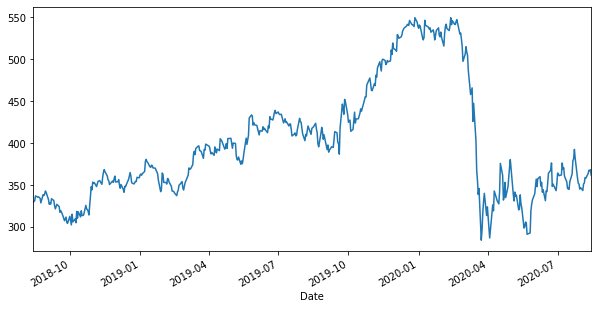

In [13]:
plt.figure(figsize=(10,5))
df['ICICI'].plot()

We notice that the ICICI stock has an upward trend between 2018 and early 2020. After which it experiences a steep fall in February - March 2020. The share price then picks up in the 2 quarter of 2020.
This shows an irregularity int the stock, thus we need to transform this trend to its equivalent stationary series. This can be achieved through the differencing of the transformations and their shift.

In [14]:
def randomtransformation(series):
    
    #Difference between the log transformation and its values that has been shifted by 1 place (row)
    LogTransformation = series.apply(lambda x : np.log(x))
    DifferenceOfLogTransformation = LogTransformation - LogTransformation.shift()
    DifferenceOfLogTransformation = DifferenceOfLogTransformation.dropna()

    #Difference between the power transformation and its values that has been shifted by 1  place (row)
    PowerTransformation = series.apply(lambda x : x ** 0.5)
    DifferenceOfPowerTransformation = PowerTransformation - PowerTransformation.shift()
    DifferenceOfPowerTransformation = DifferenceOfPowerTransformation.dropna()
    
        
    #Difference between the rolling mean and its values that has been shifted by 1  place (row)
    rollingmean = series.rolling(window = 12).mean()
    DifferenceOfRollTransformation = rollingmean - rollingmean.shift()
    DifferenceOfRollTransformation = DifferenceOfRollTransformation.dropna()
 

    plt.figure(figsize=(15,5))

    plt.subplot(2,2,1)
    series.plot()
    plt.title("Original Value")

    plt.subplot(2,2,2)
    DifferenceOfLogTransformation.plot()
    plt.title("Log Transformation Value")

    plt.subplot(2,2,3)
    DifferenceOfPowerTransformation.plot()
    plt.title("Power Transformation Value")

    plt.subplot(2,2,4)
    DifferenceOfRollTransformation.plot()
    plt.title("Rolling Mean Value")
    
    plt.tight_layout(pad=0.5)
    plt.show(block=False)
    

    print("***** Log Transformation *****")
    DF(DifferenceOfLogTransformation)
    print("***** Power Transformation *****")
    DF(DifferenceOfPowerTransformation)
    print("***** Rolling Mean *****")
    DF(DifferenceOfRollTransformation)


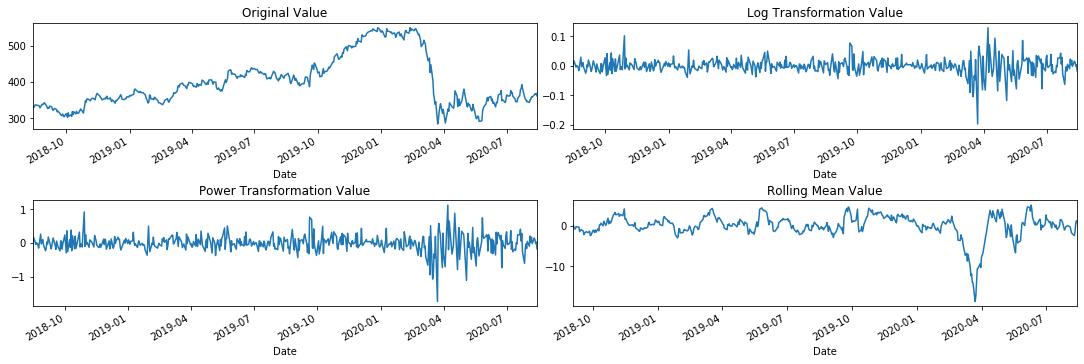

***** Log Transformation *****
Dickey Fuller Test
Test Statistic         -5.548011
p-value                 0.000002
Critical Value (1%)    -3.444281
Critical Value (5%)    -2.867683
Critical Value (10%)   -2.570042
dtype: float64

The Time-Series is Stationary

***** Power Transformation *****
Dickey Fuller Test
Test Statistic         -5.228798
p-value                 0.000008
Critical Value (1%)    -3.444251
Critical Value (5%)    -2.867670
Critical Value (10%)   -2.570035
dtype: float64

The Time-Series is Stationary

***** Rolling Mean *****
Dickey Fuller Test
Test Statistic         -4.221491
p-value                 0.000606
Critical Value (1%)    -3.444553
Critical Value (5%)    -2.867803
Critical Value (10%)   -2.570106
dtype: float64

The Time-Series is Stationary



In [15]:
randomtransformation(df['ICICI'])

The time-series has successfully been brought into a stationary state, we select the best transformation based on the p-value. Therefore we select the "Log Transformation" for future predictions. 

In [16]:
LogTransformation = df['ICICI'].apply(lambda x : np.log(x))
icici = LogTransformation - LogTransformation.shift()
icici = icici.dropna()

## 4. Model Building

We use an ARIMA model to create a predictive model. For this, it is necessary to identify the 3 values Auto-Regressive (p), Integrated / Differential (d), and Moving Average (q). To identify these values we use plot_acf and plot_pacf.

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

<Figure size 864x576 with 0 Axes>

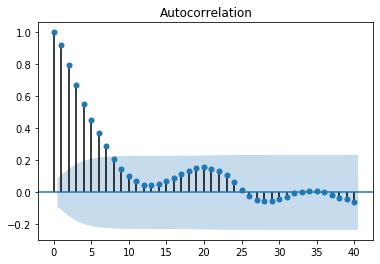

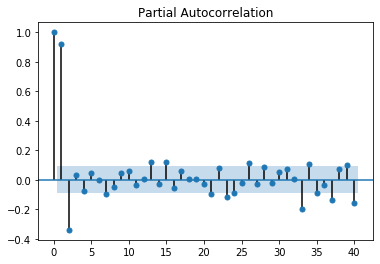

In [18]:
plt.figure(figsize=(12,8))

plot_acf(reliance,lags=40)
plot_pacf(reliance,lags=40)
plt.show()

From the above plots, we select the values of p,d, and q as 1, 0, and 1 respectively. 

In [19]:
model=ARIMA(reliance,order=(1,0,1))
model_fit=model.fit()

C:\Users\Ginelle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
relianceforecast=model_fit.predict()

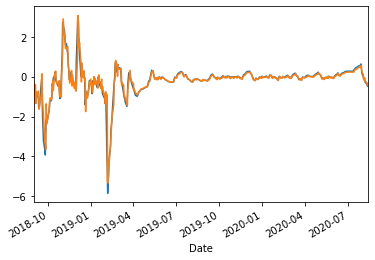

In [21]:
reliance.plot()
relianceforecast.plot()

Thus, we can use the above models to forecast future share price. 

<Figure size 864x576 with 0 Axes>

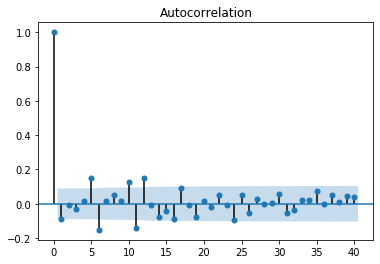

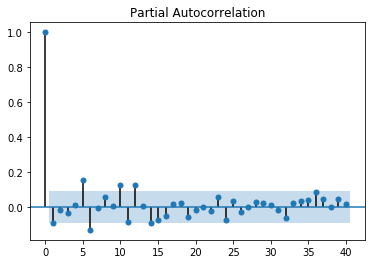

In [22]:
plt.figure(figsize=(12,8))

plot_acf(icici,lags=40)
plot_pacf(icici,lags=40)
plt.show()

From the above plots, we select the values of p,d, and q as 1, 1, and 1 respectively.

In [23]:
model=ARIMA(icici,order=(1,1,1))
model_fit=model.fit()

C:\Users\Ginelle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ginelle\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
iciciforecast=model_fit.predict()

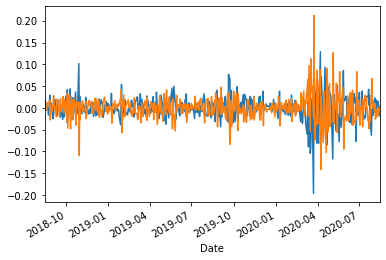

In [25]:
icici.plot()
iciciforecast.plot()

This model may not perform well as it does not fit the present data well.